In [22]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
with open('bikeid_data.pkl','r') as f:
    df = pickle.load(f)

In [74]:
with open('full_data.pkl','r') as f:
    full_df = pickle.load(f)

In [3]:
print len(df)
#print len(full_df)

871340


In [4]:
df.time_lapsed.describe()

count                      871340
mean     -1 days +21:59:51.716220
std        1 days 18:19:47.924847
min             -2 days +19:51:36
25%        0 days 00:23:35.750000
50%               0 days 01:40:00
75%               0 days 08:43:00
max              86 days 23:04:29
Name: time_lapsed, dtype: object

In [13]:
bad_bikes = df[df['time_lapsed']<0].bikeid.unique()

In [15]:
df_good_bikes = df[-df['bikeid'].isin(bad_bikes)]

In [16]:
df_good_bikes.time_lapsed.describe()

count                      818099
mean     -1 days +21:17:14.229678
std        1 days 18:43:45.010656
min               0 days 00:00:00
25%               0 days 00:23:42
50%               0 days 01:40:00
75%               0 days 08:44:04
max              86 days 23:04:29
Name: time_lapsed, dtype: object

In [21]:
df_good_bikes.bikeid.value_counts()

21079    402
19297    387
15758    380
18462    377
17703    372
18487    372
19780    370
18053    367
17341    358
21593    358
21355    357
17944    355
15802    355
20040    355
14736    354
19957    353
16693    350
17391    350
20261    348
18154    347
19112    346
21287    345
17848    344
20983    343
17405    342
16272    342
16564    342
16978    340
19138    340
21488    339
        ... 
20375      3
21427      3
15400      3
21697      3
20992      3
14569      2
16591      2
16777      2
15480      2
15152      2
17771      2
16103      2
15328      2
16876      2
15881      2
15075      2
16619      2
20954      2
17386      1
14742      1
15915      1
14542      1
15014      1
17685      1
18197      1
17535      1
21241      1
16974      1
21635      1
21703      1
dtype: int64

In [140]:
top_five = df.end_station_id_.value_counts().index[:3]
bottom_three = df_good_bikes.end_station_id_.value_counts().index[-3:]

In [ ]:
# need to incorporate coordinates

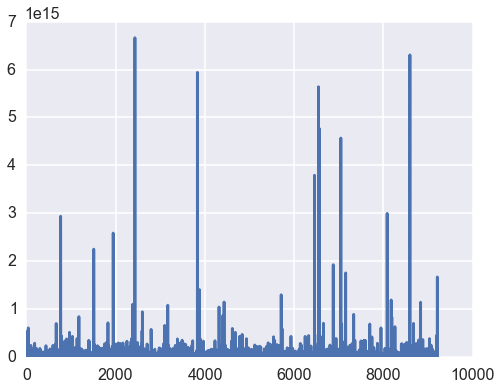

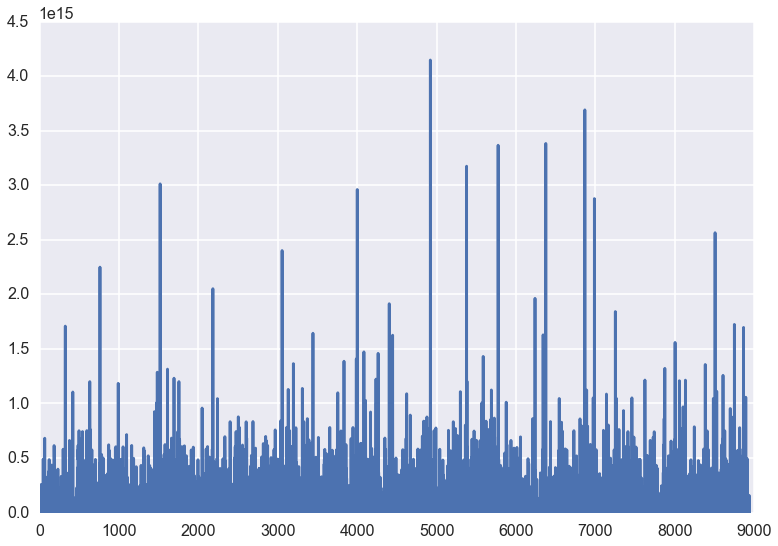

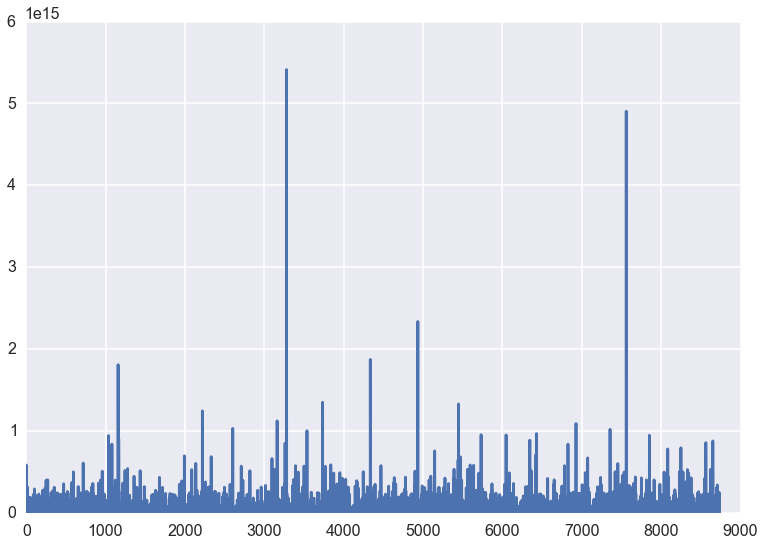

In [141]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.set_context(context="poster")

for station in top_five:
    one_station = df_good_bikes[df_good_bikes['end_station_id_']== station]
    x = range(len(one_station))
    y = one_station.time_lapsed
    ax = plt.plot(x,y)
    plt.show()

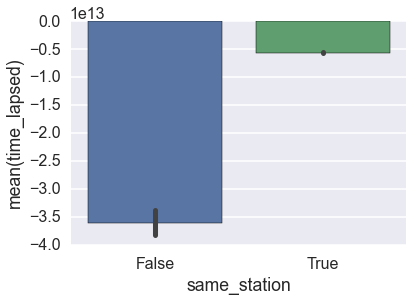

In [134]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")
sns.set_context(context="poster")
sns.barplot(x='same_station',y='time_lapsed',data=df_good_bikes, estimator=np.mean)

In [24]:
df.head()

,stoptime_,end_station_id_,n2_,b2_,bikeid_,tripduration,starttime,stoptime,start_station_id,n1,...,usertype,starttime_time,over_45,day_start,id_x,docks_x,id_y,docks_y,time_lapsed,same_station
781383,2015-02-09 09:44:00,2000,DUMBO,Brooklyn,21703,250,2015-02-14 13:43:00,2015-02-14 13:47:00,314,Brooklyn Heights,...,Subscriber,823,0,Saturday,314,39,407,43,5 days 03:59:00,False
711923,2015-02-06 06:24:00,359,Midtown,Manhattan,21699,331,2015-02-06 07:20:00,2015-02-06 07:25:00,359,Midtown,...,Subscriber,440,0,Friday,359,55,464,59,0 days 00:56:00,True
739889,2015-02-06 07:25:00,464,Midtown,Manhattan,21699,649,2015-02-10 08:37:00,2015-02-10 08:47:00,464,Midtown,...,Subscriber,517,0,Tuesday,464,59,493,34,4 days 01:12:00,True
740061,2015-02-10 08:47:00,493,Theater District,Manhattan,21699,781,2015-02-10 08:48:00,2015-02-10 09:01:00,493,Theater District,...,Subscriber,528,0,Tuesday,493,34,454,35,0 days 00:01:00,True
741113,2015-02-10 09:01:00,454,Midtown,Manhattan,21699,754,2015-02-10 10:09:00,2015-02-10 10:21:00,454,Midtown,...,Subscriber,609,0,Tuesday,454,35,485,39,0 days 01:08:00,True


In [40]:
g = df.groupby('n1')
piv = pd.DataFrame(g.n2.value_counts()).reset_index()
piv.columns = ['n1','n2','count']

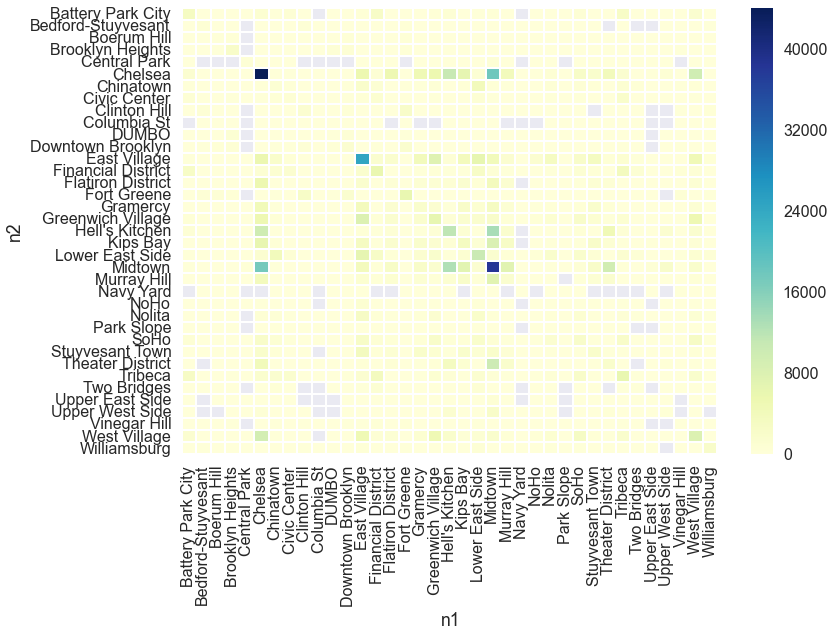

In [46]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.set_context(context="poster")
pdf = piv.pivot(columns='n1', index='n2', values='count')
sns.heatmap(pdf,linewidths=.5,cmap="YlGnBu")